In [1]:
import pystare as ps

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs

import numpy

In [2]:
def divert_stderr():
    sys.stderr = open('stderr.out','w')  
    return

def restore_stderr():
    sys.stderr.close()
    with open('stderr.out') as f:
        count = sum(1 for _ in f)
    if count > 0:
        print(count, 'warnings or errors encountered while stderr diverted. See stderr.out.')
    sys.stderr = sys.__stderr__
    return

In [3]:
# Some helper functions for plotting & printing.

class figax_container(object):
    def __init__(self,figax):
        self.fig = figax[0]
        self.ax  = figax[1]
        return

def add_coastlines(figax,set_global=False):
    "Add coastlines to the plot."
    ax = figax.ax
    if set_global:
        ax.set_global()
    ax.coastlines()
    return figax

def hello_plot(
        spatial_index_values=None
        ,figax=None
        ,plot_options={'projection':ccrs.PlateCarree(),'transform':ccrs.Geodetic()}
        ,set_global=False
        ,show=True
        ):

    if figax is None:
        figax = figax_container(plt.subplots(1,subplot_kw=plot_options))
        if set_global:
            figax.ax.set_global()
        figax.ax.coastlines()
    else:
        ax = figax.ax
    
    if spatial_index_values is not None:
        # Calculate vertices and interconnection matrix
        lons,lats,intmat = ps.triangulate_indices(spatial_index_values)
        # Make triangulation object & plot
        siv_triang = tri.Triangulation(lons,lats,intmat)
        figax.ax.triplot(siv_triang,transform=plot_options['transform'])
    
    if show:
        plt.show()
        
    return figax

def hex16(i):
    return "0x%016x"%i

km = 1 # Unit of length
deg = 1 # Unit of angle

# Set up the projection and transformation
proj         = ccrs.PlateCarree()
# proj        = ccrs.Robinson() # Drives matplotlib bug.
# proj        = ccrs.Mollweide() # Drives matplotlib bug.
transf       = ccrs.Geodetic()
plot_options = {'projection':proj,'transform':transf}

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = 1.5*default_dpi

resolution (1000.000000 km) ~ level = 3, (float 3.356144)
(lon,lat)=(-155.602778,19.479444) -> spatial_id = 0x2c2401f47797ec43

Full spatial id:              0x2c2401f47797ec43
Geolocation part (bits 61-5): 0x2c2401f47797ec40
Resolution part  (bits  4-0): 0x0000000000000003


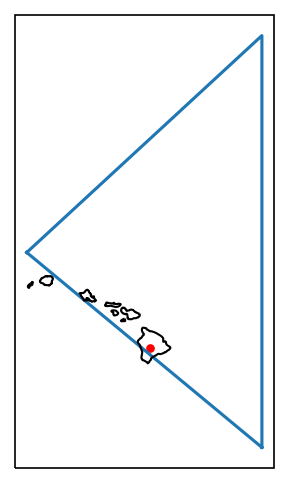

In [4]:
# Set longitude and latitude in degrees to the summit of Mauna Loa.
lon = -155.602778
lat =   19.479444

# Set the length scale of a neighborhood triangular element (trixel) about the location.
resolution_scale_km = 1000*km

# Determine the resolution, i.e. the level of the spatial quadtree, of that length scale.
spatial_resolution_level = int(ps.spatial_resolution_from_km(resolution_scale_km))

# Calculate the spatial index value.
spatial_id = ps.from_latlon([lat],[lon],spatial_resolution_level)

# Print to check.
print('resolution (%f km) ~ level = %i, (float %f)'%(resolution_scale_km
                                          ,spatial_resolution_level
                                          ,ps.spatial_resolution_from_km(resolution_scale_km)))
print('(lon,lat)=(%f,%f) -> spatial_id = %s'%(lon,lat,hex16(spatial_id[0])))
print()
print('Full spatial id:              %s'%(hex16(spatial_id[0])))
print('Geolocation part (bits 61-5): %s'%(hex16(spatial_id[0] & (~31))))
print('Resolution part  (bits  4-0): %s'%(hex16(spatial_id[0] & ( 31))))

# Plot the trixel associated with the spatial index value
figax = hello_plot(spatial_id,show=False)
# figax = add_coastlines(figax_container(plt.subplots(subplot_kw={'projection':proj,'transform':transf})))

# Plot the geolocation (lon,lat) as a red dot.
figax.ax.scatter([lon],[lat],s=10,c='r')
plt.show()


lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec43  lvl 3 ~ 1280.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec44  lvl 4 ~ 640.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec45  lvl 5 ~ 320.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec46  lvl 6 ~ 160.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec47  lvl 7 ~ 80.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec48  lvl 8 ~ 40.000000 km


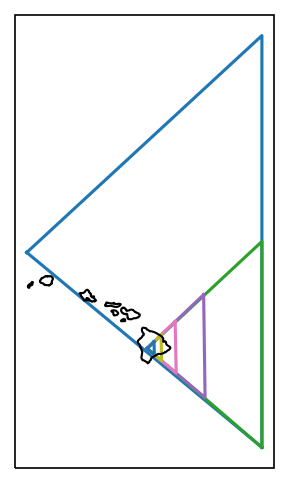

In [5]:
# Cycle through higher resolution levels
figax = add_coastlines(figax_container(plt.subplots(subplot_kw={'projection':proj,'transform':transf})))

spatial_resolution_level = 3

for siv in range(6):
    spatial_id = ps.from_latlon([lat],[lon],spatial_resolution_level)

    print('lon,lat=(%f,%f)->%s'%(lon,lat,hex16(spatial_id[0])),
          ' lvl %i ~ %f km'%(spatial_resolution_level
                             ,ps.spatial_scale_km(spatial_resolution_level)))
        
    figax = hello_plot(spatial_id,figax,plot_options,show=False)
    spatial_resolution_level = spatial_resolution_level + 1 # iterate for next

plt.show()



lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec40  lvl 0 ~ 10240.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec41  lvl 1 ~ 5120.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec42  lvl 2 ~ 2560.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec43  lvl 3 ~ 1280.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec44  lvl 4 ~ 640.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec45  lvl 5 ~ 320.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec46  lvl 6 ~ 160.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec47  lvl 7 ~ 80.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec48  lvl 8 ~ 40.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec49  lvl 9 ~ 20.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec4a  lvl 10 ~ 10.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec4b  lvl 11 ~ 5.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec4c  lvl 12 ~ 2.500000 km
lon,lat=(-155.602778,19.4

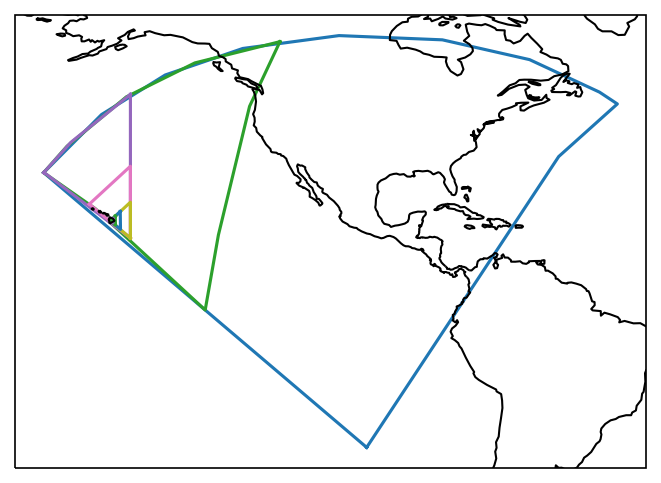

In [6]:
# Cycle through all resolution levels
figax = add_coastlines(figax_container(plt.subplots(subplot_kw={'projection':proj,'transform':transf})))

spatial_resolution_level = 0

for siv in range(28):
    spatial_id = ps.from_latlon([lat],[lon],spatial_resolution_level)

    print('lon,lat=(%f,%f)->%s'%(lon,lat,hex16(spatial_id[0])),
          ' lvl %i ~ %f km'%(spatial_resolution_level
                             ,ps.spatial_scale_km(spatial_resolution_level)))
        
    figax = hello_plot(spatial_id,figax,plot_options,show=False)
    spatial_resolution_level = spatial_resolution_level + 1 # iterate for next

plt.show()




lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec40  lvl 0 ~ 10240.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec41  lvl 1 ~ 5120.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec42  lvl 2 ~ 2560.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec43  lvl 3 ~ 1280.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec44  lvl 4 ~ 640.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec45  lvl 5 ~ 320.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec46  lvl 6 ~ 160.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec47  lvl 7 ~ 80.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec48  lvl 8 ~ 40.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec49  lvl 9 ~ 20.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec4a  lvl 10 ~ 10.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec4b  lvl 11 ~ 5.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec4c  lvl 12 ~ 2.500000 km
lon,lat=(-155.602778,19.4

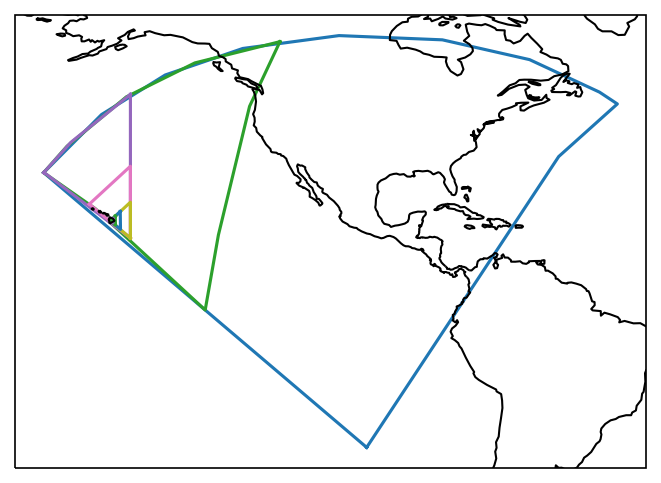

In [7]:
# Cycle through resolutions by manipulating the level in the spatial index value itself.
figax = add_coastlines(figax_container(plt.subplots(subplot_kw={'projection':proj,'transform':transf})))

spatial_id = ps.from_latlon([lat],[lon],0) # Start at the root with resolution level 0.

for siv in range(28):

    spatial_resolution_level = spatial_id & 31 # Grab the lowest 5 bits to check.

    print('lon,lat=(%f,%f)->%s'%(lon,lat,hex16(spatial_id[0])),
          ' lvl %i ~ %f km'%(spatial_resolution_level
                             ,ps.spatial_scale_km(spatial_resolution_level)))
        
    figax = hello_plot(spatial_id,figax,plot_options,show=False)
    
    spatial_id = spatial_id + 1 # increment the level (stored in the rightmost 5 bits)

plt.show()



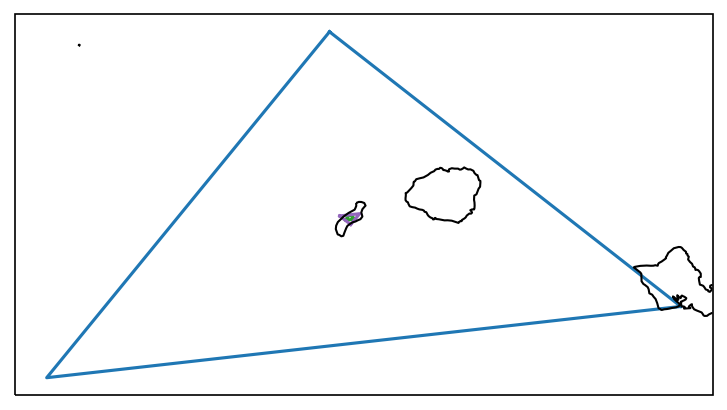

'0x1049e6000000000a'

In [8]:
figax = add_coastlines(figax_container(plt.subplots(subplot_kw={'projection':proj,'transform':transf})))
figax = hello_plot([0x1048000000000005],figax,plot_options,show=False)   # ~320 km
figax = hello_plot([0x1049e66dab30632b],figax,plot_options,show=False)   # Ni'ihau (~5 km)
figax = hello_plot([0x1049e66dab30632a],figax,plot_options,show=False)   # ~10 km
plt.show()
hex(ps.spatial_clear_to_resolution(0x1049e66dab30632a))

In [9]:
ps.to_latlon([0x1049e66dab30632b])

(array([21.89999986]), array([199.82999994]))

In [10]:
hex(ps.spatial_clear_to_resolution(0x1049e66dab30632b))

'0x1049e6600000000b'

In [11]:
hex(ps.spatial_clear_to_resolution(0x1049e66dab30632a))

'0x1049e6000000000a'

In [12]:
ps.spatial_resolution_from_km(1)

13.321928094887362

In [14]:
ps.spatial_resolution_from_km(4)

11.321928094887362